In [2]:
import pandas as pd
import os
from textblob import TextBlob
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')
import nltk
from nltk.corpus import stopwords

## Import Data

In [81]:
pwd = os.getcwd()
path = pwd + "/amazon_lap_reviews.csv"
data = pd.read_csv(path) 
data


,Stars,Review Text,Review Date,Random
0,4.0 out of 5 stars,"Pros:• USB-C, Finally! As a past Surface Pro u...","Reviewed in the United States on October 23, 2019",1
1,1.0 out of 5 stars,I skipped the 5th and 6th iterations of the Su...,"Reviewed in the United States on December 22, ...",1
2,2.0 out of 5 stars,I'm returning the surface pro 7 to amazon due ...,"Reviewed in the United States on December 10, ...",1
3,1.0 out of 5 stars,This listing is very misleading and I would no...,"Reviewed in the United States on February 8, 2020",1
4,4.0 out of 5 stars,There are a few annoyances with this product t...,"Reviewed in the United States on January 5, 2020",1
...,...,...,...,...
348,3.0 out of 5 stars,"Bought it last September, it’s now February an...","Reviewed in the United States on February 22, ...",1
349,5.0 out of 5 stars,"Love the surface pro. I used a 6 for work, so ...","Reviewed in the United States on January 7, 2020",1
350,1.0 out of 5 stars,memory on this is horrible. I bought an SD car...,"Reviewed in the United States on May 25, 2020",1
351,5.0 out of 5 stars,I got this because my old laptop was running s...,"Reviewed in the United States on July 6, 2021",1


In [82]:
stop = stopwords.words('english')
data['Review Text New'] = data['Review Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data['Review Text New'][0]

"Pros:• USB-C, Finally! As past Surface Pro user, never feature. With USB-C, like computer, much device now. From headphones connecting external 4k monitors, charging devices (USB-C chargers 10x cheaper get), even connecting Ethernet adaptor. About time Microsoft.• It’s sold machine. I go flex issues, frame feels sturdy, overall I felt I throw bag worry.• It’s light. Not IPad light, enough won’t feel worried you’re going bend it.• The microphone set Pro big upgrade. Skype calls parents came crisp clear indoor, TV on, volume. The web video is, microphone setup thumbs up.• Cortana listens pretty well. I’m learning Spanish translating even simple questions, English Spanish, Cortana lot better either using Alexa Google Assistant. Also questions directions, weather, others spot on.• Excellent display. The screen bright, outstanding saturation/color balance, also offers ambient light sensing gets dark. When go settings modify specific time, automatically adjust sun goes location.• Microsoft 

In [83]:
# Create functions to get subjectivity and polarity
def getSub(text):
    return TextBlob(text).sentiment.subjectivity
def getPol(text):\
    return TextBlob(text).sentiment.polarity
data['Subjectivity'] = data['Review Text New'].apply(getSub)
data['Polarity']= data['Review Text New'].apply(getPol)
data

,Stars,Review Text,Review Date,Random,Review Text New,Subjectivity,Polarity
0,4.0 out of 5 stars,"Pros:• USB-C, Finally! As a past Surface Pro u...","Reviewed in the United States on October 23, 2019",1,"Pros:• USB-C, Finally! As past Surface Pro use...",0.386969,0.128266
1,1.0 out of 5 stars,I skipped the 5th and 6th iterations of the Su...,"Reviewed in the United States on December 22, ...",1,"I skipped 5th 6th iterations Surface waited 7,...",0.512600,-0.080028
2,2.0 out of 5 stars,I'm returning the surface pro 7 to amazon due ...,"Reviewed in the United States on December 10, ...",1,I'm returning surface pro 7 amazon due randoml...,0.599747,-0.170455
3,1.0 out of 5 stars,This listing is very misleading and I would no...,"Reviewed in the United States on February 8, 2020",1,This listing misleading I would recommend orde...,0.430808,0.124242
4,4.0 out of 5 stars,There are a few annoyances with this product t...,"Reviewed in the United States on January 5, 2020",1,"There annoyances product lack thunderbolt 3, l...",0.503810,0.252262
...,...,...,...,...,...,...,...
348,3.0 out of 5 stars,"Bought it last September, it’s now February an...","Reviewed in the United States on February 22, ...",1,"Bought last September, it’s February charger s...",0.634375,0.288542
349,5.0 out of 5 stars,"Love the surface pro. I used a 6 for work, so ...","Reviewed in the United States on January 7, 2020",1,"Love surface pro. I used 6 work, decided one r...",0.577576,0.133939
350,1.0 out of 5 stars,memory on this is horrible. I bought an SD car...,"Reviewed in the United States on May 25, 2020",1,memory horrible. I bought SD card try make all...,1.000000,-1.000000
351,5.0 out of 5 stars,I got this because my old laptop was running s...,"Reviewed in the United States on July 6, 2021",1,I got old laptop running super slow heavier I ...,0.456944,0.168056


<function matplotlib.pyplot.show(close=None, block=None)>

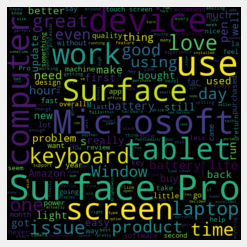

In [70]:
# Plot the word cloud

allWords = ''.join([txt for txt in data['Review Text New']])
wordCloud=  WordCloud(width=600, height=600, random_state=21, max_font_size=110).generate(allWords)
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show

In [89]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
data['Analysis'] = data['Polarity'].apply(getAnalysis)
data

,Stars,Review Text,Review Date,Random,Review Text New,Subjectivity,Polarity,Analysis
0,4.0 out of 5 stars,"Pros:• USB-C, Finally! As a past Surface Pro u...","Reviewed in the United States on October 23, 2019",1,"Pros:• USB-C, Finally! As past Surface Pro use...",0.386969,0.128266,Positive
1,1.0 out of 5 stars,I skipped the 5th and 6th iterations of the Su...,"Reviewed in the United States on December 22, ...",1,"I skipped 5th 6th iterations Surface waited 7,...",0.512600,-0.080028,Negative
2,2.0 out of 5 stars,I'm returning the surface pro 7 to amazon due ...,"Reviewed in the United States on December 10, ...",1,I'm returning surface pro 7 amazon due randoml...,0.599747,-0.170455,Negative
3,1.0 out of 5 stars,This listing is very misleading and I would no...,"Reviewed in the United States on February 8, 2020",1,This listing misleading I would recommend orde...,0.430808,0.124242,Positive
4,4.0 out of 5 stars,There are a few annoyances with this product t...,"Reviewed in the United States on January 5, 2020",1,"There annoyances product lack thunderbolt 3, l...",0.503810,0.252262,Positive
...,...,...,...,...,...,...,...,...
348,3.0 out of 5 stars,"Bought it last September, it’s now February an...","Reviewed in the United States on February 22, ...",1,"Bought last September, it’s February charger s...",0.634375,0.288542,Positive
349,5.0 out of 5 stars,"Love the surface pro. I used a 6 for work, so ...","Reviewed in the United States on January 7, 2020",1,"Love surface pro. I used 6 work, decided one r...",0.577576,0.133939,Positive
350,1.0 out of 5 stars,memory on this is horrible. I bought an SD car...,"Reviewed in the United States on May 25, 2020",1,memory horrible. I bought SD card try make all...,1.000000,-1.000000,Negative
351,5.0 out of 5 stars,I got this because my old laptop was running s...,"Reviewed in the United States on July 6, 2021",1,I got old laptop running super slow heavier I ...,0.456944,0.168056,Positive


### Print Positive Reviews

In [97]:
j =1
sortedData = data.sort_values(by=['Polarity'])
for i in range(0, sortedData.shape[0]):
    if sortedData['Analysis'][i] == 'Positive':
        print(str(j)+')'+sortedData['Review Text New'][i])
        print()
        j=j+1


1)Pros:• USB-C, Finally! As past Surface Pro user, never feature. With USB-C, like computer, much device now. From headphones connecting external 4k monitors, charging devices (USB-C chargers 10x cheaper get), even connecting Ethernet adaptor. About time Microsoft.• It’s sold machine. I go flex issues, frame feels sturdy, overall I felt I throw bag worry.• It’s light. Not IPad light, enough won’t feel worried you’re going bend it.• The microphone set Pro big upgrade. Skype calls parents came crisp clear indoor, TV on, volume. The web video is, microphone setup thumbs up.• Cortana listens pretty well. I’m learning Spanish translating even simple questions, English Spanish, Cortana lot better either using Alexa Google Assistant. Also questions directions, weather, others spot on.• Excellent display. The screen bright, outstanding saturation/color balance, also offers ambient light sensing gets dark. When go settings modify specific time, automatically adjust sun goes location.• Microsoft

In [100]:
j =1
sortedData2 = data.sort_values(by=['Analysis'], ascending=False)
for i in range(0, sortedData.shape[0]):
    if sortedData['Analysis'][i] == 'Negative':
        print(str(j)+')'+sortedData['Review Text New'][i])
        print()
        j=j+1


1)I skipped 5th 6th iterations Surface waited 7, I truly excited new 10nm i7 processor, ram, better wifi... Unfortunately, truth new Surface model big, expensive, outdated disappointment… Not screen exactly previous model, still doesn’t support HDR, HDR+, OR 4k quality apps. Really? For $1500, 2019 Microsoft gives us cutting edge tech 2016. Thanks! Furthermore, built-in SSD dreadfully slow, new LPDDR4x ram faster LPDDR3 new usb-c port doesn’t charge device, seriously, even powerful, fastest chargers I dint charge it, including one came tablet. Oh, since DP port longer usb-c HDMI adapter must order connect external monitor, additional expense. The seemingly positive change Intel’s new WiFi6 chipset it’s nearly enough justify price premium Surface 6, besides, freezes lot drains battery quickly. There are, however, issues even significant:1) Horrible, unacceptable battery life! Even low brightness, everything Wi-Fi tuned I can’t squeeze 5 hours work it, AFTER firmware update.2) Both camer

# Plot Polarity and Subjectivity

<function matplotlib.pyplot.show(close=None, block=None)>

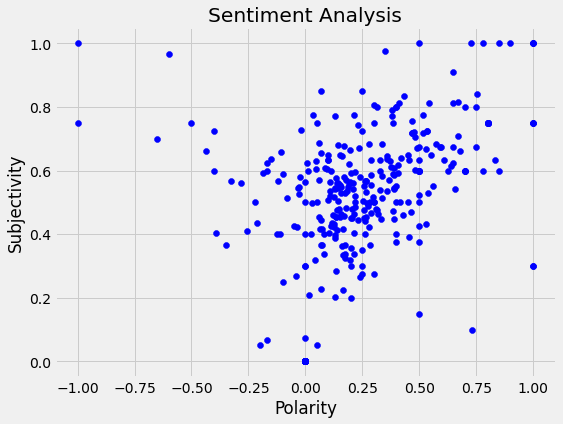

In [102]:
plt.figure(figsize=(8,6))
for i in range(0, data.shape[0]):
    plt.scatter(data['Polarity'][i], data['Subjectivity'][i], color ='Blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show

### Percent of Positive Reviews

In [106]:
poreviews= data[data.Analysis == 'Positive']
poreviews = poreviews['Review Text']
round(poreviews.shape[0] / data.shape[0]*100, 1)

75.1

### Percent of Negative Reviews

In [107]:
NegReviews = data[data.Analysis == 'Negative']
NegReviews = NeReviews['Review Text']
round(NeReviews.shape[0]/data.shape[0]*100,1)

10.2

# Percent of Neutral Reviews

In [108]:
NeuReviews = data[data.Analysis == 'Neutral']
NeuReviews = NeuReviews["Review Text"]
round(NeuReviews.shape[0]/data.shape[0]*100,1)

14.7

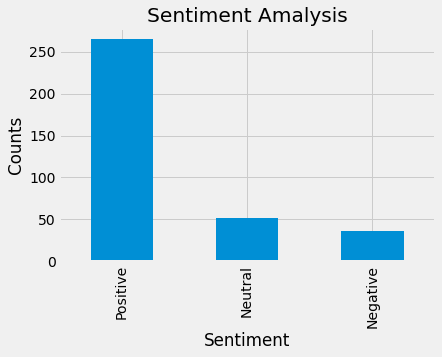

In [110]:
data['Analysis'].value_counts()
plt.title('Sentiment Amalysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
data['Analysis'].value_counts().plot(kind='bar')
plt.show()